# Monte-Carlo Propagation of Uncertainty


Suppose you measure the diameter, the thickness, and the mass of a disk to estimate its density. 

| attribute | value  | uncertainty ($\sigma$) |
|-----------|--------|-------------|
| diameter (d)  | 3.2 cm | 0.1 cm      |
| thickness (t)| 0.6 cm | 0.1 cm      |
| mass      (m) | 45.4 g | 0.1 g       |

How do you compute density? 

$$\rho = \frac{m}{V} = \frac{m}{\pi (d/2)^2 t} = \frac{4 m}{\pi d^2 t}$$

Good! So let's do it:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

d = 3.2
t = 0.6
m = 45.4

V = np.pi*(d/2)**2*t

rho = m/V
print("Density = {0:5.2f} g/cm^3".format(rho))

Density =  9.41 g/cm^3


So $\rho = 9.41 g/cm^3$, but what's the uncertainty in the density $\sigma_{\rho}$?

You could do it with calculus as described [here](Parameter%20Estimation.ipynb), but you can also do it with a Monte-Carlo (MC) technique like this:

(5, 20)

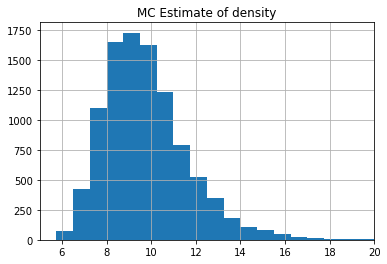

In [2]:
sigma_d = 0.1
sigma_t = 0.1
sigma_m = 0.1
N = 10000

dMC = d + sigma_d*np.random.normal(size=N)
tMC = t + sigma_t*np.random.normal(size=N)
mMC = m + sigma_m*np.random.normal(size=N)

VMC = np.pi*(dMC/2)**2*tMC
rhoMC = mMC/VMC

pl.hist(rhoMC,bins=np.linspace(5,20,21))
pl.grid()
pl.title("MC Estimate of density")
pl.xlim(5,20)


In [3]:
print("Rho estimate: {0:5.3f} +/- {1:5.3f} g/cm^3".format(rhoMC.mean(), 2*rhoMC.std()))

Rho estimate: 9.768 +/- 3.819 g/cm^3
